# Benchmark queries for Opensearch

This notebook executes the queries for Opensearch and measure the execution time of them. It shows you the results in ms for each execution and provide visualization for the results.

In [1]:
%cd ..
from opensearchpy import OpenSearch, helpers
from src.queries_opensearch import queries_os
import pandas as pd
from pprint import pp
from dotenv import load_dotenv
from tqdm import tqdm
import os
def ppr(resp):
    pp(resp.raw)
import time
import matplotlib.pyplot as plt
import seaborn as sns

c:\ulb\SearchEngines_benchmark


c:\ulb\SearchEngines_benchmark\venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Connecting to database

In [2]:
load_dotenv()

# Recupera la variabile della password dall'ambiente
OPENSEARCH_INITIAL_ADMIN_PASSWORD = os.getenv("OPENSEARCH_INITIAL_ADMIN_PASSWORD")
OPENSEARCH_URL = os.getenv("OPENSEARCH_URL")  # Ad esempio http://localhost:9200

# Verifica che la password sia stata caricata correttamente
if OPENSEARCH_INITIAL_ADMIN_PASSWORD:
    print("Password caricata con successo.")
else:
    print("Errore nel caricare la password.")

Password caricata con successo.


In [3]:
client = OpenSearch(
    hosts=[OPENSEARCH_URL],
    http_auth=("admin", OPENSEARCH_INITIAL_ADMIN_PASSWORD),
    use_ssl=False,
    verify_certs=False,
    ssl_assert_hostname=False,
    ssl_show_warn=False
)
try:
    info = client.info()
    print("Conection to OpenSearch succeded!")
except Exception as e:
    print(f"Error when connecting: {e}")

Conection to OpenSearch succeded!


### Executing Queries

In [4]:
# Initialize empty dataframe
df_results = pd.DataFrame(columns=['query_id', 'execution_time','run'])

#### Define the number of interations for each query

In [5]:
number_of_interations = 51
print(f"Each query will be executed {number_of_interations} times")

Each query will be executed 51 times


In [6]:
for i in range(len(queries_os)):
    query_id=i+1
    print(f'Executing query {query_id}')
    counter = 0
    while counter < number_of_interations:
        # Measure execution time
        start_time = time.time()
        resp = queries_os[i](client)
        execution_time = time.time() - start_time
        execution_time_ms = execution_time*1000
        # Save results in a pandas DataFrame
        data = {
            "query_id":query_id ,
            "execution_time": [execution_time_ms],
            "run":counter+1
        }

        df = pd.DataFrame(data)
        df_results=pd.concat([df_results, df])
        counter+=1 # update counter

Executing query 1


C:\Users\jidsc\AppData\Local\Temp\ipykernel_27972\978487417.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results=pd.concat([df_results, df])


Executing query 2
Executing query 3
Executing query 4
Executing query 5
Executing query 6
Executing query 7
Executing query 8
Executing query 9
Executing query 10
Executing query 11
Executing query 12
Executing query 13
Executing query 14
Executing query 15
Executing query 16
Executing query 17
Executing query 18


## Results visualization

In [7]:
# drop the first run to avoid cache problem
df_results = df_results[df_results['run']!=1] 

In [8]:
df_avg = df_results.groupby('query_id').agg({'execution_time':'mean'}).reset_index()

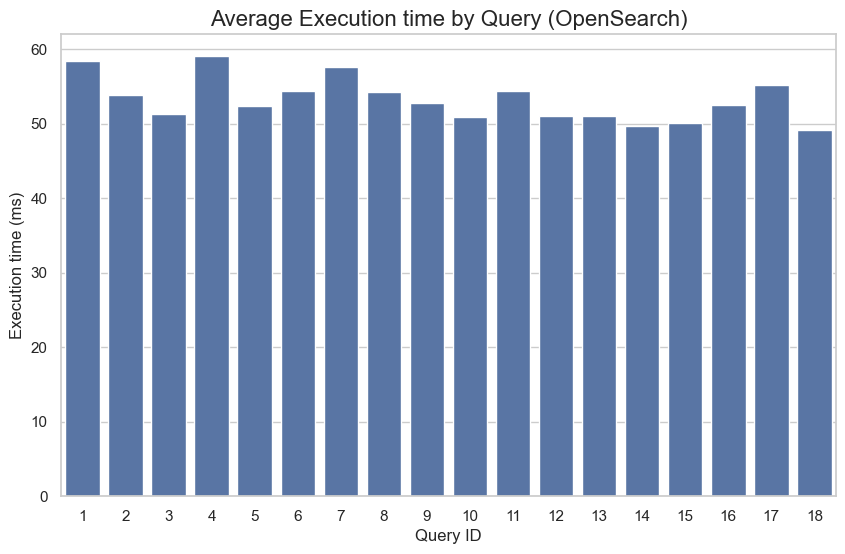

In [9]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
sns.barplot(data=df_avg, x='query_id', y='execution_time')
# Add title and labels
plt.title("Average Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()

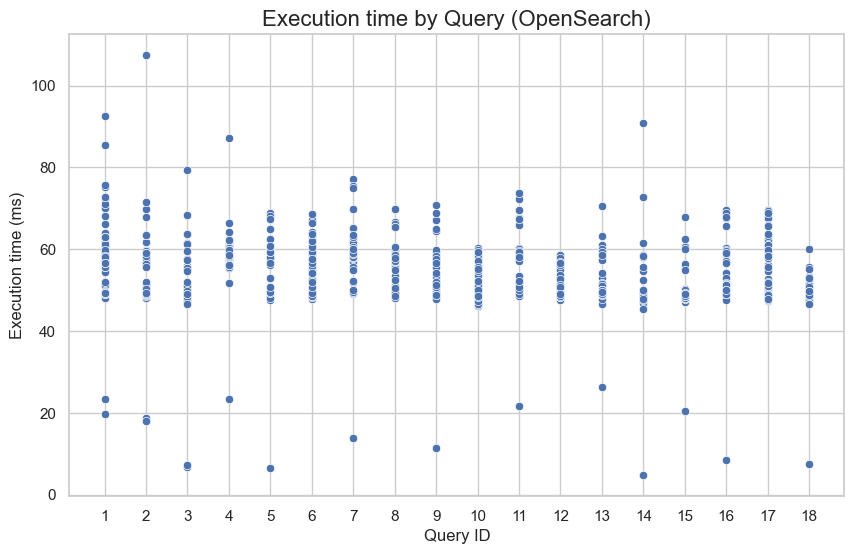

In [10]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
df_results['query_id'] = df_results['query_id'].astype(str)
sns.scatterplot(data=df_results, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()

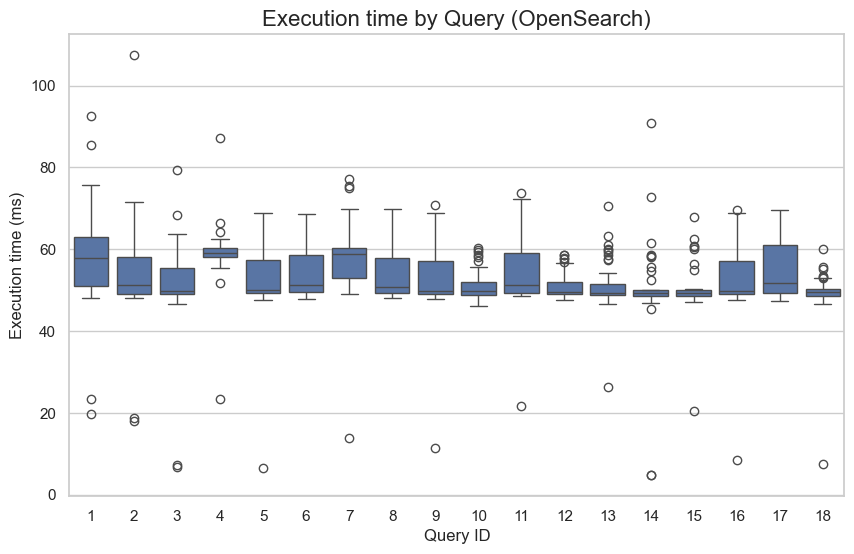

In [11]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
df_results['query_id'] = df_results['query_id'].astype(str)
sns.boxplot(data=df_results, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
# Show the plot
plt.show()